In [9]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [10]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [11]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [12]:
df['Year'] = df['Day'].map(lambda date: date.year )
print('coldest year: ',df.groupby(['Year']).mean()['t'].idxmin())
print('hottest year: ',df.groupby(['Year']).mean()['t'].idxmax())

coldest year:  2012
hottest year:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [13]:
df['Month'] = df['Day'].map(lambda date: date.month )
hot_days_jan = df[ (df['t']>=0) & (df['Month'] == 1)]
print(hot_days_jan['Day'].groupby(df['Year']).count().idxmax())

2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [14]:
summer = df[(df['Month'] > 5) & (df['Month'] < 9)]
print(summer['Year'].groupby(df['Year']).mean().idxmin())

2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [15]:
print('max difference =  ', abs(df['t'].diff()).max())
df.iloc[abs(df['t'].diff()).idxmax()-1].Day

max difference =   15.0


Timestamp('2014-05-26 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

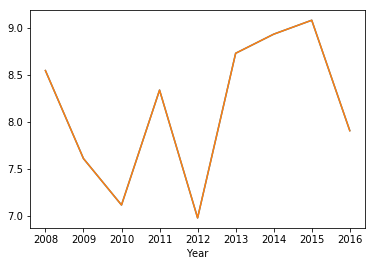

In [16]:
df.groupby(['Year']).mean()['t'].plot()
plt.show()